<h1 align="center">An Evaluation of the Top 2023 Streamed Spotify Tracks</h1>

<h2 align="center">How Spotify Artist Create Top Songs</h2>

<p align="center"><img align="center" src="Spotify-logo.png" width=100></p>
<p align="center">Image obtained from <a href="https://www.spotify.com/us/premium/">Spotify</a></p>

**Naaman Trumbull**
<br>
**Fall 2024 Data Science Project**

This project was completed independently as a final project for CMSC320: Introduction to Data Science at the University of Maryland. The purpose of this project is to analyze listening trends among users of the Music Streaming platform *Spotify* in the year 2023.  

Naaman performed all the research, wrote all of the python code, and organized the entirty of this project. He was responsible for all main parts of the projects listed in the outline:
- A: Project idea
- B: Dataset Curation and Preprocessing
- C: Data Exploration and Summary Statistics
- D: ML Algorithm Design/Development
- E: ML Algorithm Training and Test Data Analysis
- F: Visualization, Result Analysis, Conclusion
- G: Final Tutorial Report Creation
- H: Additional (not listed above)

## Introduction


By August of 2012, the music streaming service, Spotify, had amassed 15 million global active users after being launched just 3 years earlier in the United Kingdom. Nearly 4 million of these users had subscribed to premium. The music streaming service was designed as a way for consumers to legally stream copyrighted music from their favorite artist. It launched in a time when rates of pirated music was at an all time high.

In 2023, Spotify reached 640 million active users. This included 236 million users who were subscribed to Premium. While Spotify may have initially been intended to be used as a means for users to listen to their favorite artists, it also turned into a tool for rising artists to grow their fanbases. New Artists to the platform now need to understand how to best use the platform in order to have the best commercial success with their music.

The main purpose of this analysis is to understand what features of a track can lead to a successful song on the platform. In this analysis, we will define success based on the total number of streams that a song gets. The more streams a song receives, the higher success it recevies.

In order to understand what types of features make a track successful on Spotify, we will analyze the top streamed tracks for the year 2023. Thru this journey, we will hope to answer the following questions:

1. Does the time of year the song is released impact total streams?
2. Does increasing the number of collaborators impact total streams?
3. What other factors could play a role in the overall success of a Spotify track?

These questions are important for rising artists to know about. The answers to these questions will help them to make important decisions about how they will promote their music so that they can gain more streams and grow their fanbases.

## Data Curation




As previously mentioned, we want to analyze tracks that we already know have a lot of streams in order to understand what features make a song successful.

The data which we will be curating was published on Kaggle by Nidula Elgiriyewithana in 2023. It is a dataset titled "Most Streamed Spotify Songs 2023."

Dataset Source: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

The following dataset contains the 953 most streamed songs of 2023. These are *not* the 953 most streamed songs on Spotify, but rather the songs that received the most streams during the year itself. The following features are included in the dataset for each song:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

*This summary is copied straight from the Kaggle page linked above.

### Data input
We will now import and modify our data in order to prepare it for analysis.

We will be using pandas Dataframes in order to organize our data. We have downloaded and stored the data into a csv file titled "spotify-2023.csv." A summary of the contents of the database is read and imported into the dataframe below:


In [70]:
import pandas as pd # We will store our data as pandas Dataframes
import matplotlib.pyplot as plt
import numpy as np

# We need to specify the encoding of the CSV as 'latin-1' in order
# to parse the data correctly.
spotify_df = pd.read_csv("spotify-2023.csv", sep=',',  encoding='latin-1')
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Modifying the Release Date
Our first modification will be to combine the release year, day, and month, into one column in the dataframe. In the process, we will remove the `['released_year', 'released_month', 'released_day']` columns.

In [71]:
spotify_df['Release Date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                                     spotify_df['released_month'].astype(str) + '-' +
                                                     spotify_df['released_day'].astype(str),
                                                     errors='coerce')

spotify_df.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)
spotify_df['Release Date']

,Release Date
0,2023-07-14
1,2023-03-23
2,2023-06-30
3,2019-08-23
4,2023-05-18
...,...
948,2022-11-03
949,2022-10-21
950,2022-11-03
951,2022-10-20


### Calculating Listenable Days
Later on in our analysis, we will wish to see if the time of when the song is released impacts the amount of streams it receives.

We want to add a column called `[listenable_days]` which displays the number of days that the song was available to be streamed in the year 2023. Some songs are released earlier in 2023 while others are released later in 2023. Some songs may have been released prior to 2023, meaning that they were available to stream for all 365 days of the year.

For example, if the song was released 12/31/23, then the number of listenable days would be 1, but if it were released on 1/1/23 or earlier, then it would be 365.

We will now add this feature to our dataframe:

In [72]:
from datetime import datetime

def calculate_listenable_days(release_date):
  if release_date is pd.NaT:
    return 365

  if release_date.year > 2023:
    return 0

  if release_date.year < 2023:
    return 365

  end_of_year = datetime(2023, 12, 31)
  return (end_of_year - release_date).days + 1

spotify_df['listenable_days'] = spotify_df['Release Date'].apply(calculate_listenable_days)
spotify_df[['Release Date', 'listenable_days']]

,Release Date,listenable_days
0,2023-07-14,171
1,2023-03-23,284
2,2023-06-30,185
3,2019-08-23,365
4,2023-05-18,228
...,...,...
948,2022-11-03,365
949,2022-10-21,365
950,2022-11-03,365
951,2022-10-20,365


### Fixing Types
We want to make sure that all types in the dataframe are being interpreted incorrectly. We do not want numeric or array-structured values to be interpreted as strings. Here, we go through each feature of the dataframe and ensure that all the values are being properly formatted.

In [73]:
spotify_df['artist_count'] = pd.to_numeric(spotify_df['artist_count'], errors='coerce')
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce')
spotify_df['in_deezer_charts'] = pd.to_numeric(spotify_df['in_deezer_charts'], errors='coerce')
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce')
spotify_df['bpm'] = pd.to_numeric(spotify_df['bpm'], errors='coerce')
spotify_df['danceability_%'] = pd.to_numeric(spotify_df['danceability_%'], errors='coerce')
spotify_df['valence_%'] = pd.to_numeric(spotify_df['valence_%'], errors='coerce')
spotify_df['energy_%'] = pd.to_numeric(spotify_df['energy_%'], errors='coerce')
spotify_df['acousticness_%'] = pd.to_numeric(spotify_df['acousticness_%'], errors='coerce')
spotify_df['instrumentalness_%'] = pd.to_numeric(spotify_df['instrumentalness_%'], errors='coerce')
spotify_df['liveness_%'] = pd.to_numeric(spotify_df['liveness_%'], errors='coerce')
spotify_df['speechiness_%'] = pd.to_numeric(spotify_df['speechiness_%'], errors='coerce')
spotify_df['in_spotify_playlists'] = pd.to_numeric(spotify_df['in_spotify_playlists'], errors='coerce')
spotify_df['in_spotify_charts'] = pd.to_numeric(spotify_df['in_spotify_charts'], errors='coerce')
spotify_df['in_apple_playlists'] = pd.to_numeric(spotify_df['in_apple_playlists'], errors='coerce')
spotify_df['in_apple_charts'] = pd.to_numeric(spotify_df['in_apple_charts'], errors='coerce')
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')
spotify_df.dropna(subset=['streams'], inplace=True)
spotify_df['streams'] = spotify_df['streams'].astype(int)
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Release Date,listenable_days
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45.0,10,...,Major,80,89,83,31,0,8,4,2023-07-14,171
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58.0,14,...,Major,71,61,74,7,0,10,4,2023-03-23,284
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91.0,14,...,Major,51,32,53,17,0,31,6,2023-06-30,185
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125.0,12,...,Major,55,58,72,11,0,11,15,2019-08-23,365
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87.0,15,...,Minor,65,23,80,14,63,11,6,2023-05-18,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37.0,1,...,Major,60,24,39,57,0,8,3,2022-11-03,365
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8.0,0,...,Major,42,7,24,83,1,12,6,2022-10-21,365
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7.0,0,...,Major,80,81,67,4,0,8,6,2022-11-03,365
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17.0,0,...,Major,82,67,77,8,0,12,5,2022-10-20,365


## Exploratory Data Analysis



### Question 1: Does the time of year the song is released impact total streams?
Timing is extremely important for upcoming artists. How much time should there be in between releasing songs? Should a song be marketed as a Summer song or perhaps a Winter song? For high profile artist, the timing for when to release music is important for applying to win high profile awards such as a Grammy. If they release their music at the same time as other high profile artists, there may be too much competition, causing them to be erased by the competition. When looking at a year end summary, can we conclude that releasing earlier in the year equates to earning more streams?

In this section, I propose that songs which were available to stream for 250 or more days had more total streams than songs available to stream for less than 250 days.

#### Notation
- Let $\mu_L$ denote the mean streams of all songs that were available for less than 250 days in 2023.
- Let $\mu_M$ denote the mean streams of all songs that were available for at least 250 days in 2023.

**Null Hypothesis:** $\mu_M = \mu_L$ <br>
**Alternative Hypothesis:** $\mu_M - \mu_L > 0$

We need a sample to test this hypothesis, so we will use the most streamed songs of 2023 as our sample. We will then use a two sample Z test to compare how sample means of the streams for songs available less than 250 days compare to the mean streams for songs available at least 250 days. Note that we are missing streams info for one song. This row will be removed.

In [74]:
songs_less = spotify_df[spotify_df['listenable_days'] < 250]['streams']
songs_more = spotify_df[spotify_df['listenable_days'] >= 250]['streams']

songs_less = songs_less.dropna()
songs_more = songs_more.dropna()

print("Sample size of songs available less than 250 days in 2023")
display(songs_less.count())
print("Sample size of songs available at least 250 days in 2023")
display(songs_more.count())

Sample size of songs available less than 250 days in 2023


77

Sample size of songs available at least 250 days in 2023


875

Since our sample size for each group is greater than 30, we can use a two sample Z test.  

We now perform a two sample Z test to test our null hypothesis.

In [75]:
from statsmodels.stats.weightstats import ztest

z_stat, p_value = ztest(songs_more, songs_less)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 7.298183936251271
P-value: 2.916777244138687e-13


Since our p-value is nearly 0, we have reasonable evidence to reject our null hypothesis. We have strong statistical evidence to support the fact that the mean streams of songs available for at least 250 days in 2023 is greater than that of those available for less than 250 days.

The following code creates a scatter plot showing the listenable days versus the total streams. As our hypothesis test shows, the number of streams increases as the number of listenable days increases.

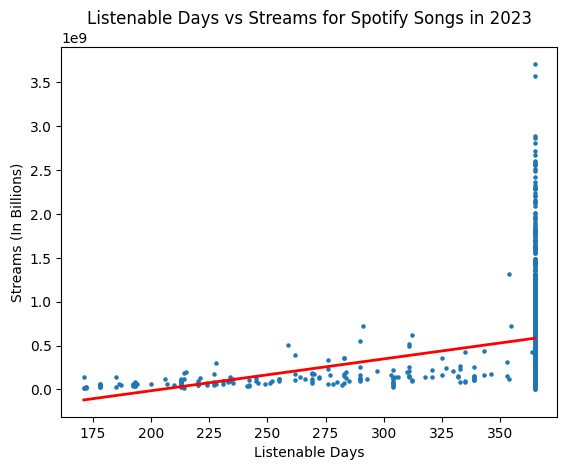

In [76]:
spotify_df.sort_values(by='streams', ascending=False)

to_chart = spotify_df[['listenable_days', 'streams']].dropna()

a, b = np.polyfit(to_chart['listenable_days'], to_chart['streams'], 1)

plt.scatter(to_chart['listenable_days'], to_chart['streams'], s=5)
plt.plot(to_chart['listenable_days'], a*to_chart['listenable_days'] + b, color='red', linewidth=2)

plt.title('Listenable Days vs Streams for Spotify Songs in 2023')
plt.xlabel('Listenable Days')
plt.ylabel('Streams (In Billions)')
plt.show()

### Question 2: Does increasing the number of collaborators impact total streams?
A popular tactic for upcoming artist is to collaborate with other artist in an attempt to bring fans from one fanbase to another. This is why it is common for up and coming artist to open for a larger artist who is on their tour.

The 2nd conclusion I would like to test is if the number of artist that are featured on a song increases the total streams a song receieves. Do collaborative songs generally have more streams themselves? This is the conclusion I want to analyze.

#### Notation

- Let $\mu_n$ represent the average streams for songs with $n$ contributing artists.

**Null Hypothesis:** $\mu_1 = \mu_2 = \ldots = \mu_n$ <br>
**Alternative Hypothesis:** At least one of the $\mu_n$ values differs from the other.

For our sample, we will again use the most popular songs on spotify of 2023. Let us group the songs by number of artist and see how many songs fall into each category.

In [77]:
total_artist_counts = spotify_df.groupby('artist_count')['streams'].count()
total_artist_counts

,streams
artist_count,
1,586
2,254
3,85
4,15
5,5
6,3
7,2
8,2


We have a significant number of tracks with 1, 2, and 3 artists. Since there sample sizes exceed 30, let us only consider the average streams of songs with only those number of artists for now. Because we are comparing three means, we will perform an ANOVA test.

In [78]:
from scipy.stats import f_oneway

one_artist = spotify_df[spotify_df['artist_count'] == 1]['streams']
two_artist = spotify_df[spotify_df['artist_count'] == 2]['streams']
three_artist = spotify_df[spotify_df['artist_count'] == 3]['streams']
f_stat, p_value = f_oneway(one_artist, two_artist, three_artist)

print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 5.931254019329487
P-value: 0.0027575236402697287


If we use a 99% confidence level, then our p-value of .002 < .01. This means our p-value is small enough to reject our null hypothesis and conclude that the mean number of streams differs depending on the total number of artist. This is not enough information to tell us about how the means compare to each other so we will perform post hoc analysis.

For our post hoc analysis, we will draw a line graph to show how the average streams compare depending on weather there is 1, 2, or 3 artists.

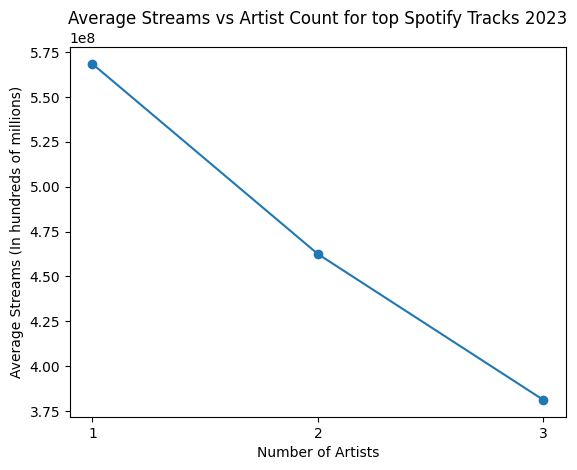

In [79]:
total_artist_means = spotify_df[spotify_df['artist_count'] <= 3].groupby('artist_count')['streams'].mean()
plt.plot(total_artist_means.index, total_artist_means.values, marker='o')
plt.title('Average Streams vs Artist Count for top Spotify Tracks 2023')
plt.xticks(total_artist_means.index)
plt.xlabel('Number of Artists')
plt.ylabel('Average Streams (In hundreds of millions)')
plt.show()

Although our sample size is small compared to the number of total tracks available to listen to on spotify, we can use this sample of tracks to conclude that the number of artists on a track can actually decrease streams.

I would be interested in trying different samples of tracks to see if this data trend repeated. I am curious if using only the most streamed tracks of the year would actually create bias in my results.

Earlier, when we were grouping the tracks by total artists, I noticed that there were fewer tracks that had 6, 7, or even 8 artists. I would consider these tracks to be outliers in this data.

### Question 3: What other factors could play a role in the overall success of a Spotify track?
In this section, we want to find correlations between how the song actually sounds vs the number of streams. Our dataset includes factors such as `[danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%].` All of these categories have to do with how the songs actually sound. Could there be a correlation between the number of streams and the acousticness of a song? In this section, we aim to find this out.

#### Danceability vs Streams

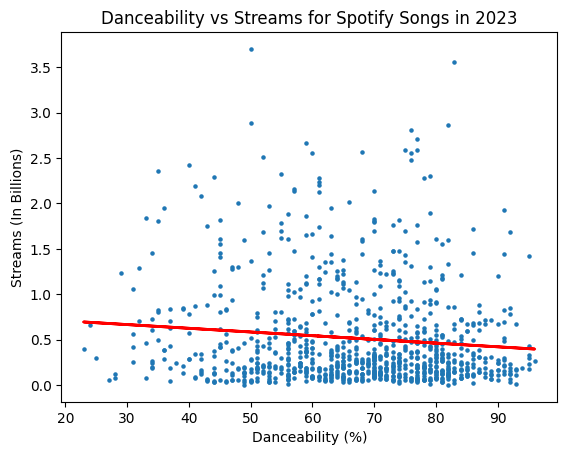

Correlation Coefficient: -0.11
Model: y = -0.0040856958x + 0.7878146698


In [80]:

correlation_coefficient = spotify_df[['danceability_%', 'streams']].corr()

x = spotify_df['danceability_%']
y = spotify_df['streams'] / 1e9 # Convert Streams to Billions for easier
                                # calculations in matplotlib

plt.scatter(x, y, s=5)
plt.xlabel('Danceability (%)')
plt.ylabel('Streams (In Billions)')
plt.title('Danceability vs Streams for Spotify Songs in 2023')

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='red', linewidth=2)

correlation_value = correlation_coefficient.loc['danceability_%', 'streams']

plt.show()
print(f"Correlation Coefficient: {correlation_value:.2f}")
print(f"Model: y = {a:.10f}x + {b:.10f}")


#### Valence vs Streams

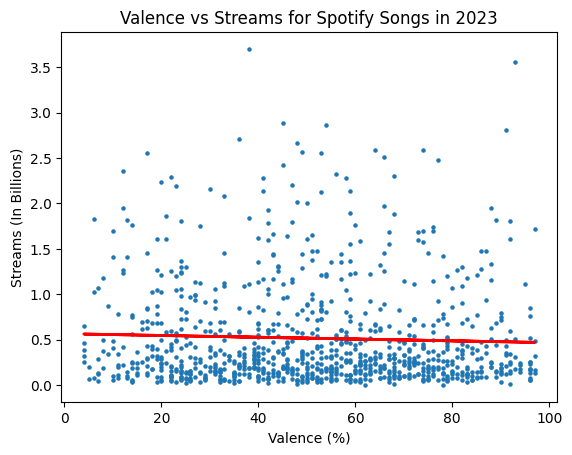

Correlation Coefficient: -0.04
Model: y = -0.0009857336x + 0.5648105539


In [81]:
correlation_coefficient = spotify_df[['valence_%', 'streams']].corr()

x = spotify_df['valence_%']
y = spotify_df['streams'] / 1e9 # Convert Streams to Billions for easier
                                # calculations in matplotlib

plt.scatter(x, y, s=5)
plt.xlabel('Valence (%)')
plt.ylabel('Streams (In Billions)')
plt.title('Valence vs Streams for Spotify Songs in 2023')

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='red', linewidth=2)

correlation_value = correlation_coefficient.loc['valence_%', 'streams']

plt.show()
print(f"Correlation Coefficient: {correlation_value:.2f}")
print(f"Model: y = {a:.10f}x + {b:.10f}")

#### Energy vs Streams

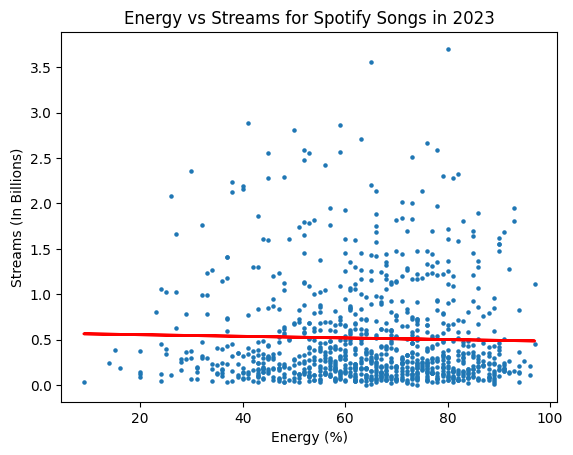

Correlation Coefficient: -0.03
Model: y = -0.0008918351x + 0.5714593788


In [82]:
correlation_coefficient = spotify_df[['energy_%', 'streams']].corr()

x = spotify_df['energy_%']
y = spotify_df['streams'] / 1e9 # Convert Streams to Billions for easier
                                # calculations in matplotlib

plt.scatter(x, y, s=5)
plt.xlabel('Energy (%)')
plt.ylabel('Streams (In Billions)')
plt.title('Energy vs Streams for Spotify Songs in 2023')

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='red', linewidth=2)

correlation_value = correlation_coefficient.loc['energy_%', 'streams']

plt.show()
print(f"Correlation Coefficient: {correlation_value:.2f}")
print(f"Model: y = {a:.10f}x + {b:.10f}")

#### Acousticness vs Streams

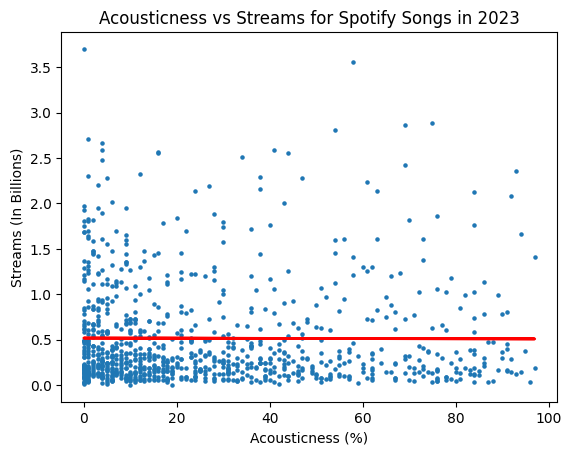

Correlation Coefficient: -0.00
Model: y = -0.0000977692x + 0.5167848968


In [83]:
correlation_coefficient = spotify_df[['acousticness_%', 'streams']].corr()

x = spotify_df['acousticness_%']
y = spotify_df['streams'] / 1e9 # Convert Streams to Billions for easier
                                # calculations in matplotlib

plt.scatter(x, y, s=5)
plt.xlabel('Acousticness (%)')
plt.ylabel('Streams (In Billions)')
plt.title('Acousticness vs Streams for Spotify Songs in 2023')

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='red', linewidth=2)

correlation_value = correlation_coefficient.loc['acousticness_%', 'streams']

plt.show()
print(f"Correlation Coefficient: {correlation_value:.2f}")
print(f"Model: y = {a:.10f}x + {b:.10f}")

#### Instrumentalness vs Streams

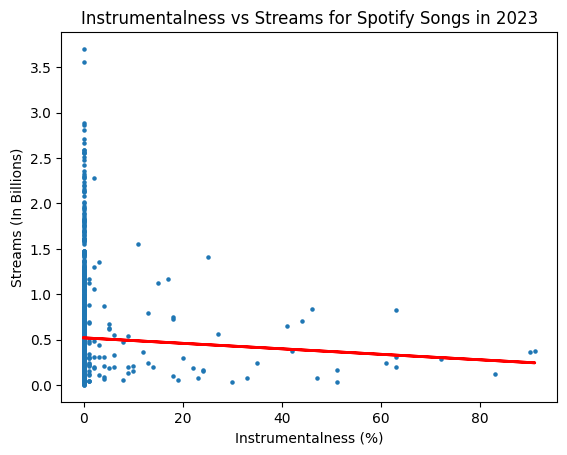

Correlation Coefficient: -0.04
Model: y = -0.0030250874x + 0.5189260875


In [84]:
correlation_coefficient = spotify_df[['instrumentalness_%', 'streams']].corr()

x = spotify_df['instrumentalness_%']
y = spotify_df['streams'] / 1e9 # Convert Streams to Billions for easier
                                # calculations in matplotlib

plt.scatter(x, y, s=5)
plt.xlabel('Instrumentalness (%)')
plt.ylabel('Streams (In Billions)')
plt.title('Instrumentalness vs Streams for Spotify Songs in 2023')

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='red', linewidth=2)

correlation_value = correlation_coefficient.loc['instrumentalness_%', 'streams']

plt.show()
print(f"Correlation Coefficient: {correlation_value:.2f}")
print(f"Model: y = {a:.10f}x + {b:.10f}")

#### Liveness vs Streams

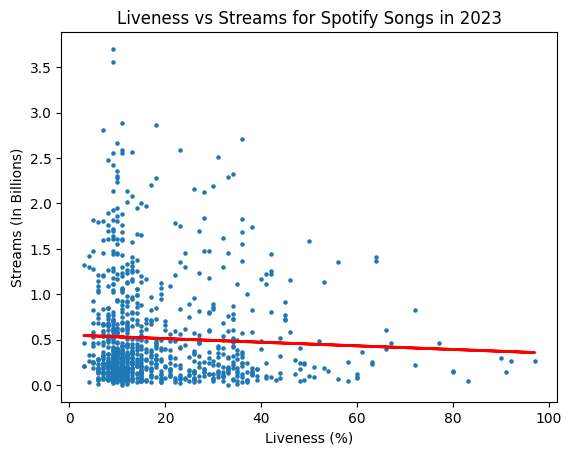

Correlation Coefficient: -0.05
Model: y = -0.0019973455x + 0.5505176462


In [85]:
correlation_coefficient = spotify_df[['liveness_%', 'streams']].corr()

x = spotify_df['liveness_%']
y = spotify_df['streams'] / 1e9 # Convert Streams to Billions for easier
                                # calculations in matplotlib

plt.scatter(x, y, s=5)
plt.xlabel('Liveness (%)')
plt.ylabel('Streams (In Billions)')
plt.title('Liveness vs Streams for Spotify Songs in 2023')

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='red', linewidth=2)

correlation_value = correlation_coefficient.loc['liveness_%', 'streams']

plt.show()
print(f"Correlation Coefficient: {correlation_value:.2f}")
print(f"Model: y = {a:.10f}x + {b:.10f}")

#### Speechiness vs Streams

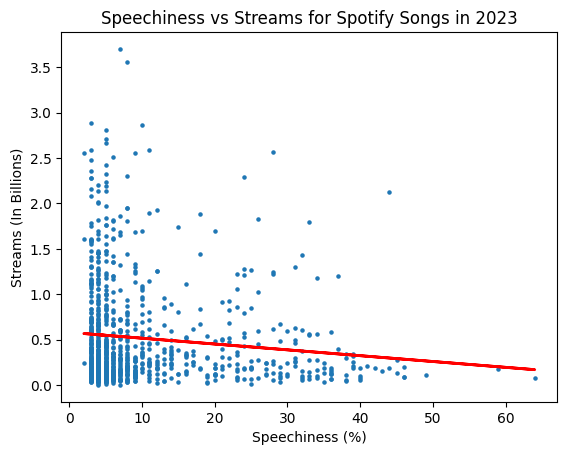

Correlation Coefficient: -0.11
Model: y = -0.0064220047x + 0.5792479180


In [86]:
correlation_coefficient = spotify_df[['speechiness_%', 'streams']].corr()

x = spotify_df['speechiness_%']
y = spotify_df['streams'] / 1e9 # Convert Streams to Billions for easier
                                # calculations in matplotlib

plt.scatter(x, y, s=5)
plt.xlabel('Speechiness (%)')
plt.ylabel('Streams (In Billions)')
plt.title('Speechiness vs Streams for Spotify Songs in 2023')

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='red', linewidth=2)

correlation_value = correlation_coefficient.loc['speechiness_%', 'streams']

plt.show()
print(f"Correlation Coefficient: {correlation_value:.2f}")
print(f"Model: y = {a:.10f}x + {b:.10f}")

After looking at the above scatter plots, models and correlation coefficents, it should be clear that there were no correlations that were found. Nearly all of the Pearson correlation coefficients are close to 0. The slope values in each of our models are also close to 0. Most of the scatter plots appear to be randomly scattered. All of these signs indicate no correlation.

Analyzing these results has made me wonder how else these factors could have impacted stream numbers. I noticed in some of the scatter plots that there were some clumps of points. It made me wonder if songs that are highly streamed on spotify tend to have certain sounds most of the time. What would happen if we made frequency graphs for each sound feature?

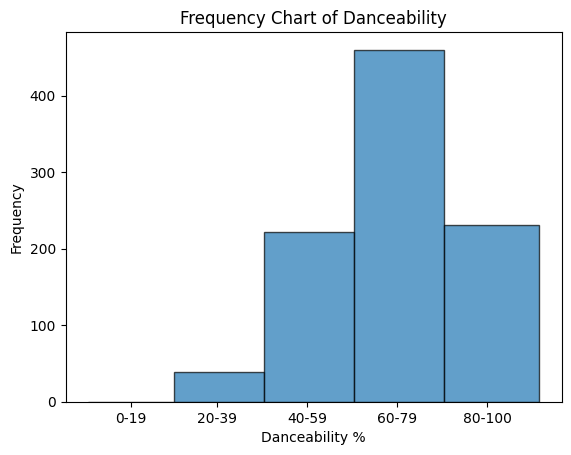

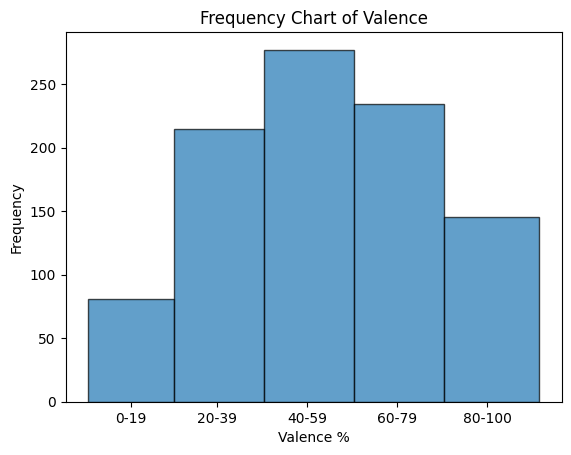

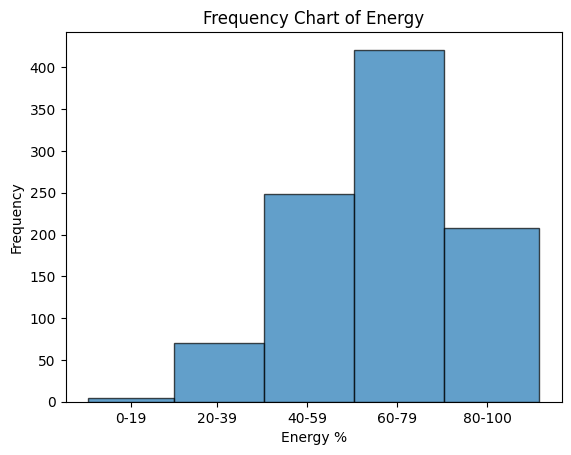

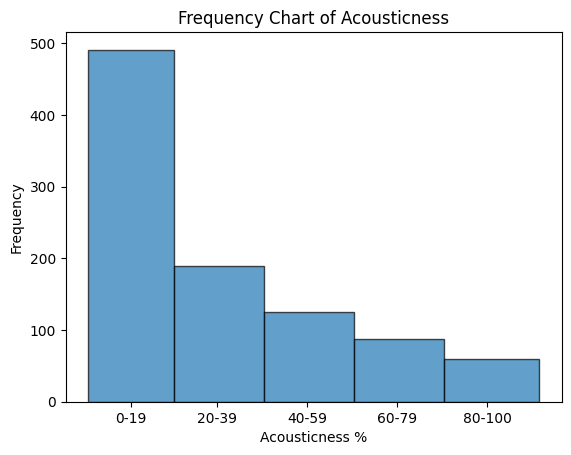

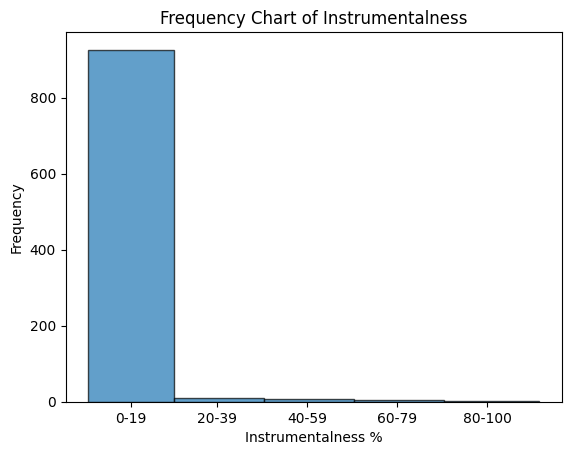

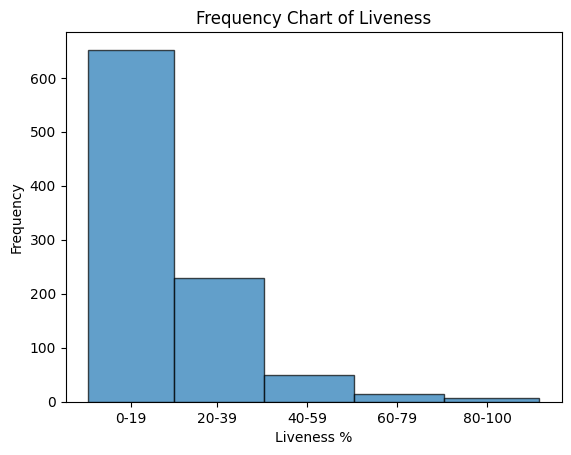

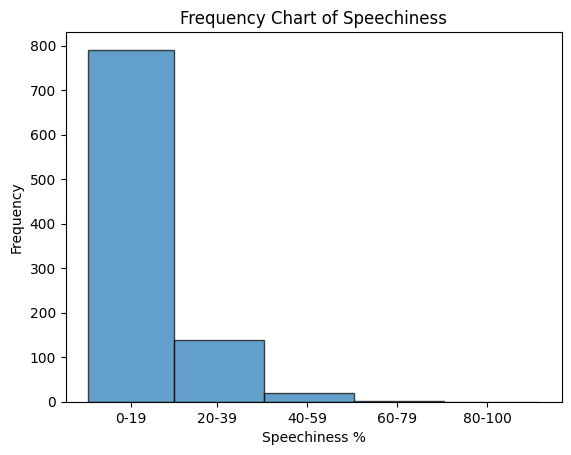

In [87]:

def create_freq_chart(paramter, label):
  energy_data = spotify_df[paramter]
  bins = [0, 19, 39, 59, 79, 100]
  labels = ['0-19', '20-39', '40-59', '60-79', '80-100']
  plt.hist(energy_data, bins=bins, edgecolor='black', alpha=0.7)
  tick_positions = np.array(bins[:-1]) + (bins[1] - bins[0]) / 2
  plt.xticks(tick_positions, labels)  # Set custom x-axis ticks and labels
  plt.xlabel(f'{label} %')
  plt.ylabel('Frequency')
  plt.title(f'Frequency Chart of {label}')
  plt.show()

create_freq_chart('danceability_%', 'Danceability')
create_freq_chart('valence_%', 'Valence')
create_freq_chart('energy_%', 'Energy')
create_freq_chart('acousticness_%', 'Acousticness')
create_freq_chart('instrumentalness_%', 'Instrumentalness')
create_freq_chart('liveness_%', 'Liveness')
create_freq_chart('speechiness_%', 'Speechiness')

While we were unable to find any sort of correlation for these features when compared to total streams, the scatter plots did lead me in the direction of examining their frequency plots. It is clear that patterns exist for what types of sounds help a song to reach a lot of streams. Most of the top songs of 2023 had very low speechiness, instrumentalness, acousticness, and liveness. Conversely, most of the top songs of 2023 had very high energy and danceability. These trends will lead us into the right direction that we need in order to fully answer our guiding questions.

## Primary Analysis

We have explored our data thoroughly at this point. We have explored the possibility of how releasing music at different points in the year can effect total streams. Additionally, we have considered weather or not having more collaborators on a song increases or decreases total streams. Finally, we looked at how top songs tend to sound overall to see if certain sounds were more popular. In this section, we aim to use machine learning techniques to further answer our questions.

### Linear Regressions
### Question 1: Does the time of year the song is released impact total streams?
Looking at different machine learning techniques, I found that the only one which made sense to apply in this scenario was a linear regression. We have our dependent variable of total number of streams, and we want to estimate it based on some controlled independent variable. In this case, the independent variable is the time at which songs were released.

For this section, I would like to filter our database to only include tracks that were released in 2023. We want to focus on those songs that performed well within the grasp of one singular year in order to find the optimal time to release music.

In [88]:
songs_2023 = spotify_df[spotify_df['Release Date'].dt.year == 2023]
songs_2023[['track_name', 'Release Date']]

,track_name,Release Date
0,Seven (feat. Latto) (Explicit Ver.),2023-07-14
1,LALA,2023-03-23
2,vampire,2023-06-30
4,WHERE SHE GOES,2023-05-18
5,Sprinter,2023-06-01
...,...,...
381,I'm Not Here To Make Friends,2023-01-27
382,TRUSTFALL,2023-01-27
385,VIBE (feat. Jimin of BTS),2023-01-13
398,Muï¿½ï¿½,2023-01-12


We now want to perform our linear regression. We will use a linear regression model with a test sample size of 50%.

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = songs_2023[['listenable_days']]
y = songs_2023['streams'] # Target Variable

# Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)  # Adjust test_size as needed

# Create and train the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set:
y_pred = model.predict(X_test)

# Evaluating our model:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Checking the validity of our model:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 2.5907459964381348e+16
R-squared: 0.18213876439386856
Coefficients: [1151336.29324492]
Intercept: -168479356.18007272


### Question 2: Does increasing the number of collaborators impact total streams?
In this section, we wish to run another linear regression. This time, our independent variable will be total collaborators, and our dependent variable will remain as total streams. We wish to only use data from songs released in 2023.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = songs_2023[['artist_count']]
y = songs_2023['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 3.2712021416668484e+16
R-squared: -0.03267145030014862
Coefficients: [-1095293.02042712]
Intercept: 132898222.5078923


See 'Visualization' section for a plots of these 2 models.

## Visualization

In this section, we will create visualizations for each part of the "Primary Analysis" section.

### Question 1 Model (Does the time of year the song is released impact total streams?)



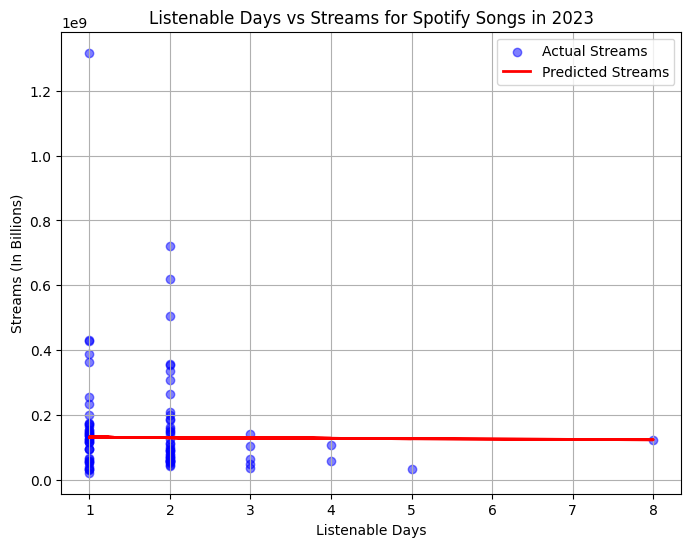

In [91]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual data
plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Actual Streams')

# Line of best fit using model predictions
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Streams')

plt.xlabel('Listenable Days')
plt.ylabel('Streams (In Billions)')
plt.title('Listenable Days vs Streams for Spotify Songs in 2023')
plt.legend()
plt.grid(True)
plt.show()

The above model was created by first making a scatter plot of listenable days vs total streams. We only considered songs that were released in 2023 to fully understand when the best time period is to release music within an isolated time. We include a line of best fit. This line is built from the parameters we calculated in the Primary Analysis Section.

Overall, the model is what I would expect. I noted that on average, the total streams tend to slightly increase for songs that were released earlier in the year. The 2 songs that have the most streams were available to stream for more than 350 days in 2023! **If you are a new artist, it would make sense (based on our analysis) to release music earlier in the year if you want your songs to perform well in end of year summaries.**

After we performed our linear regression, we also received an $R^2$ value of around 0.182. This means that about 18% of the variance in streams can be explained by the variance in listenable days. This is not a good coverage and it suggest that the correlation we found is not strong.

### Question 2 Model (Does increasing the number of collaborators impact total streams?)

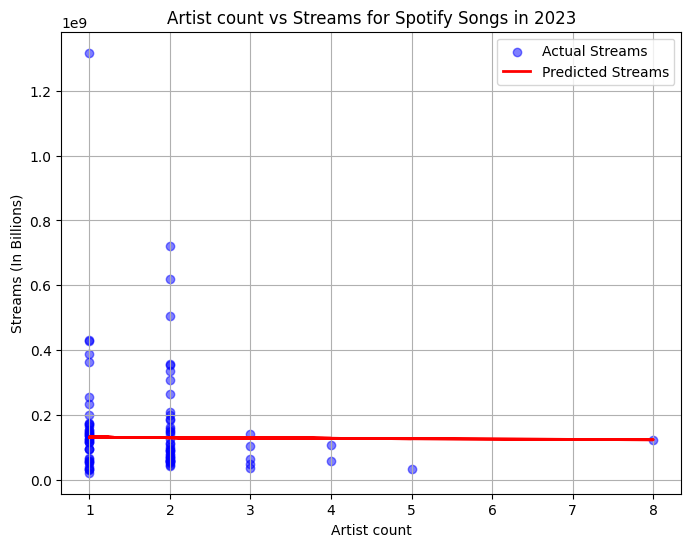

In [92]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual data
plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Actual Streams')

# Line of best fit using model predictions
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Streams')

plt.xlabel('Artist count')
plt.ylabel('Streams (In Billions)')
plt.title('Artist count vs Streams for Spotify Songs in 2023')
plt.legend()
plt.grid(True)
plt.show()

The only substantial difference between this model and the last model is that we are not comparing artist count to streams. **We can see that there is clearly no correlation between the number of artist and artist count, at least in reference to our data.** The linear regression has an $R^2$ value of -0.03267. This means that a very little of the variance of streams can be explained by the variance of artist count.

## Insights and Conclusions

Rising artists on Spotify are always looking for ways to grow their fanbases and music on the platform. Understanding the trends and user patterns of the platform can substantially increase the likelihood of success for an artist. That is why it is important to find answers to our target questions.

To Conclude, I will acknowledge that our topic questions require much more analysis and much more data to fully answer. With that said, I believe that those who are unfamiliar with the world of content creation and Spotify can still find this analysis useful. This analysis provides a beginning level understanding of the types of planning and marketing an artist has to do. Being an artist is a job, and the largest artist have teams that help them with their marketing and promotion. These teams are responsible for tracking the desires of fans so that the artist can perform better and increase their fanbase. I hope that this analysis can serve as a good introduction for the uninformed reader who does not understand how this industry works.

For those who are already familiar with this industry, the work in this analysis should not look very sophisticated. Those who are experts in marketing for the music industry should know that there are many more factors that determine the success of a song. We defined success of a song in this tutorial to be based on total streams. There are countless other ways for a songs success to be measured. Billboard rankings, merchandise sales, weather it won awards, and tour sales are some examples. Someone who is already familiar with this industry could go even further with this data and incorporate even more factors into their models.



## Bibliography

***Data Curation***
- Nidula Elgiriyewithana. (2023). Most Streamed Spotify Songs 2023 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6367938

***Image Citation***
- Spotify Logo: https://www.spotify.com/us/premium/

***Helpful Python Resources***
- Linear Regression: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
- Pandas Dataframe Documentation:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
- Matplotlib: https://matplotlib.org/stable/users/index.html
- Numpy: https://numpy.org/devdocs/user/absolute_beginners.html
- Scipy Stats: https://docs.scipy.org/doc/scipy/reference/stats.html
- Z-Test: https://www.geeksforgeeks.org/z-test/

***Helpful Articles***
- https://www.britannica.com/topic/Spotify
- https://www.businessofapps.com/data/spotify-statistics/
- https://www.statista.com/statistics/367739/spotify-global-mau/
- https://www.oberlo.com/statistics/how-many-spotify-premium-users-are-there

